In [1]:
#importing libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Flight_Price_Data.csv")
df.head(5)

,Unnamed: 0,Name,Date,Source,Destination,Departure Time,Arrival Time,Duration,No.of stops,Price
0,0,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,14:40,20:15,5h 35m,1 Stop,"5,953"
1,1,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,09:25,16:00,6h 35m,1 Stop,"5,953"
2,2,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953"
3,3,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,18:40,06:20\n+ 1 day,11h 40m,1 Stop,"5,953"
4,4,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,16:15,06:20\n+ 1 day,14h 05m,1 Stop,"5,953"


In [3]:
#Checking for Null values
df.isnull().sum()

Unnamed: 0           0
Name                 0
Date              1026
Source               0
Destination          0
Departure Time       0
Arrival Time         0
Duration             0
No.of stops          0
Price                0
dtype: int64

In [4]:
df.shape

(1630, 10)

In [6]:
#Date is having more null value, and the null values are towards the end, so replacing NaN with Wed, 15 Nov
df['Date'] = df['Date'].replace(np.nan,"Wed, 15 Nov")

In [7]:
#Dropping Unnamed: 0 as well as it is the index
df = df.drop(['Unnamed: 0'],axis=1)
df.head(3)

,Name,Date,Source,Destination,Departure Time,Arrival Time,Duration,No.of stops,Price
0,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,14:40,20:15,5h 35m,1 Stop,"5,953"
1,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,09:25,16:00,6h 35m,1 Stop,"5,953"
2,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953"


In [8]:
#Checking the datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1630 non-null   object
 1   Date            1630 non-null   object
 2   Source          1630 non-null   object
 3   Destination     1630 non-null   object
 4   Departure Time  1630 non-null   object
 5   Arrival Time    1630 non-null   object
 6   Duration        1630 non-null   object
 7   No.of stops     1630 non-null   object
 8   Price           1630 non-null   object
dtypes: object(9)
memory usage: 114.7+ KB


In [9]:
df['Arrival Time'] = df["Arrival Time"].str.split('\n').str[0]

In [11]:
#Converting to datetime format

df['Arrival Time']=pd.to_datetime(df['Arrival Time'])
df['Departure Time']=pd.to_datetime(df['Departure Time'])


#Extracting hour and minute from Departure time and Arrival Time
df['Dep_Hour'] = df['Departure Time'].dt.hour
df['Dep_Minute'] = df['Departure Time'].dt.minute
df['Arrival_Hour'] = df['Arrival Time'].dt.hour
df['Arrival_Minute'] = df['Arrival Time'].dt.hour
df=df.drop('Arrival Time',axis=1)
df=df.drop('Departure Time',axis=1)

In [12]:
df.head(3)

,Name,Date,Source,Destination,Duration,No.of stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,5h 35m,1 Stop,"5,953",14,40,20,20
1,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,6h 35m,1 Stop,"5,953",9,25,16,16
2,Air Asia,"Sat, 23 Oct",New Delhi,Mumbai,7h 35m,1 Stop,"5,953",12,40,20,20


In [13]:
#Converting the columns to lower case
df["Name"] = df["Name"].str.lower()

df["Source"] = df["Source"].str.lower()

df["Destination"] = df["Destination"].str.lower()

df["No.of stops"] = df["No.of stops"].str.lower()

df['Date'] = df['Date'].str.lower()

In [14]:
df.head(3)

,Name,Date,Source,Destination,Duration,No.of stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,air asia,"sat, 23 oct",new delhi,mumbai,5h 35m,1 stop,"5,953",14,40,20,20
1,air asia,"sat, 23 oct",new delhi,mumbai,6h 35m,1 stop,"5,953",9,25,16,16
2,air asia,"sat, 23 oct",new delhi,mumbai,7h 35m,1 stop,"5,953",12,40,20,20


In [15]:
#Replacing comma on Price
df["Price"] = df["Price"].str.replace(",","")

In [16]:
df.head(3)

,Name,Date,Source,Destination,Duration,No.of stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,air asia,"sat, 23 oct",new delhi,mumbai,5h 35m,1 stop,5953,14,40,20,20
1,air asia,"sat, 23 oct",new delhi,mumbai,6h 35m,1 stop,5953,9,25,16,16
2,air asia,"sat, 23 oct",new delhi,mumbai,7h 35m,1 stop,5953,12,40,20,20


In [17]:
#Converting Price to int datatype
df['Price'] = df['Price'].astype(int)

In [18]:
df.head(3)

,Name,Date,Source,Destination,Duration,No.of stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,air asia,"sat, 23 oct",new delhi,mumbai,5h 35m,1 stop,5953,14,40,20,20
1,air asia,"sat, 23 oct",new delhi,mumbai,6h 35m,1 stop,5953,9,25,16,16
2,air asia,"sat, 23 oct",new delhi,mumbai,7h 35m,1 stop,5953,12,40,20,20


In [19]:
#Extracting Duration hour and Duration minute from Duration

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" or " h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

df['Duration_hour'] = duration_hours
df['Duration_minute'] = duration_mins

df=df.drop('Duration',axis=1)

In [20]:
df.head(3)

,Name,Date,Source,Destination,No.of stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,air asia,"sat, 23 oct",new delhi,mumbai,1 stop,5953,14,40,20,20,5,35
1,air asia,"sat, 23 oct",new delhi,mumbai,1 stop,5953,9,25,16,16,6,35
2,air asia,"sat, 23 oct",new delhi,mumbai,1 stop,5953,12,40,20,20,7,35


In [21]:
df.shape

(1630, 12)

In [26]:
#Seperating categorical variables

cat_col = [column for column in df.columns if df[column].dtype=='object']
print("--------------------------Categorical Variables--------------------------")
print(cat_col)

--------------------------Categorical Variables--------------------------
['Name', 'Date', 'Source', 'Destination', 'No.of stops']


In [27]:
cont_col = [column for column in df.columns if df[column].dtype!='object']
print("---------------------------Continuous Variables------------------------------")
cont_col

---------------------------Continuous Variables------------------------------


['Price',
 'Dep_Hour',
 'Dep_Minute',
 'Arrival_Hour',
 'Arrival_Minute',
 'Duration_hour',
 'Duration_minute']

In [29]:
#Onehot encoding is applied for Name, Source and Destination & Label encoding technique is applied to No.of stops

categorical = df[cat_col]
onehot_variables = pd.get_dummies(categorical[['Name','Source','Destination']],drop_first=True)

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in ['No.of stops','Date']:
    categorical[i]=lab_enc.fit_transform(categorical[i])

<ipython-input-29-2e371cb31ae7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=lab_enc.fit_transform(categorical[i])


In [30]:
df = pd.concat([categorical,onehot_variables,df[cont_col]],axis=1)
df.head(3)

,Name,Date,Source,Destination,No.of stops,Name_air india,Name_go first,Name_indigo,Name_spicejet,Name_vistara,...,Source_pune,Destination_mumbai,Destination_new delhi,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,air asia,0,new delhi,mumbai,0,0,0,0,0,0,...,0,1,0,5953,14,40,20,20,5,35
1,air asia,0,new delhi,mumbai,0,0,0,0,0,0,...,0,1,0,5953,9,25,16,16,6,35
2,air asia,0,new delhi,mumbai,0,0,0,0,0,0,...,0,1,0,5953,12,40,20,20,7,35


In [31]:
# Dropping Name, Source and Destination

df = df.drop(columns=['Name','Source','Destination'],axis=1)
df.head(3)

,Date,No.of stops,Name_air india,Name_go first,Name_indigo,Name_spicejet,Name_vistara,Source_new delhi,Source_pune,Destination_mumbai,Destination_new delhi,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,0,0,0,0,0,0,0,1,0,1,0,5953,14,40,20,20,5,35
1,0,0,0,0,0,0,0,1,0,1,0,5953,9,25,16,16,6,35
2,0,0,0,0,0,0,0,1,0,1,0,5953,12,40,20,20,7,35


In [32]:
df.shape

(1630, 18)

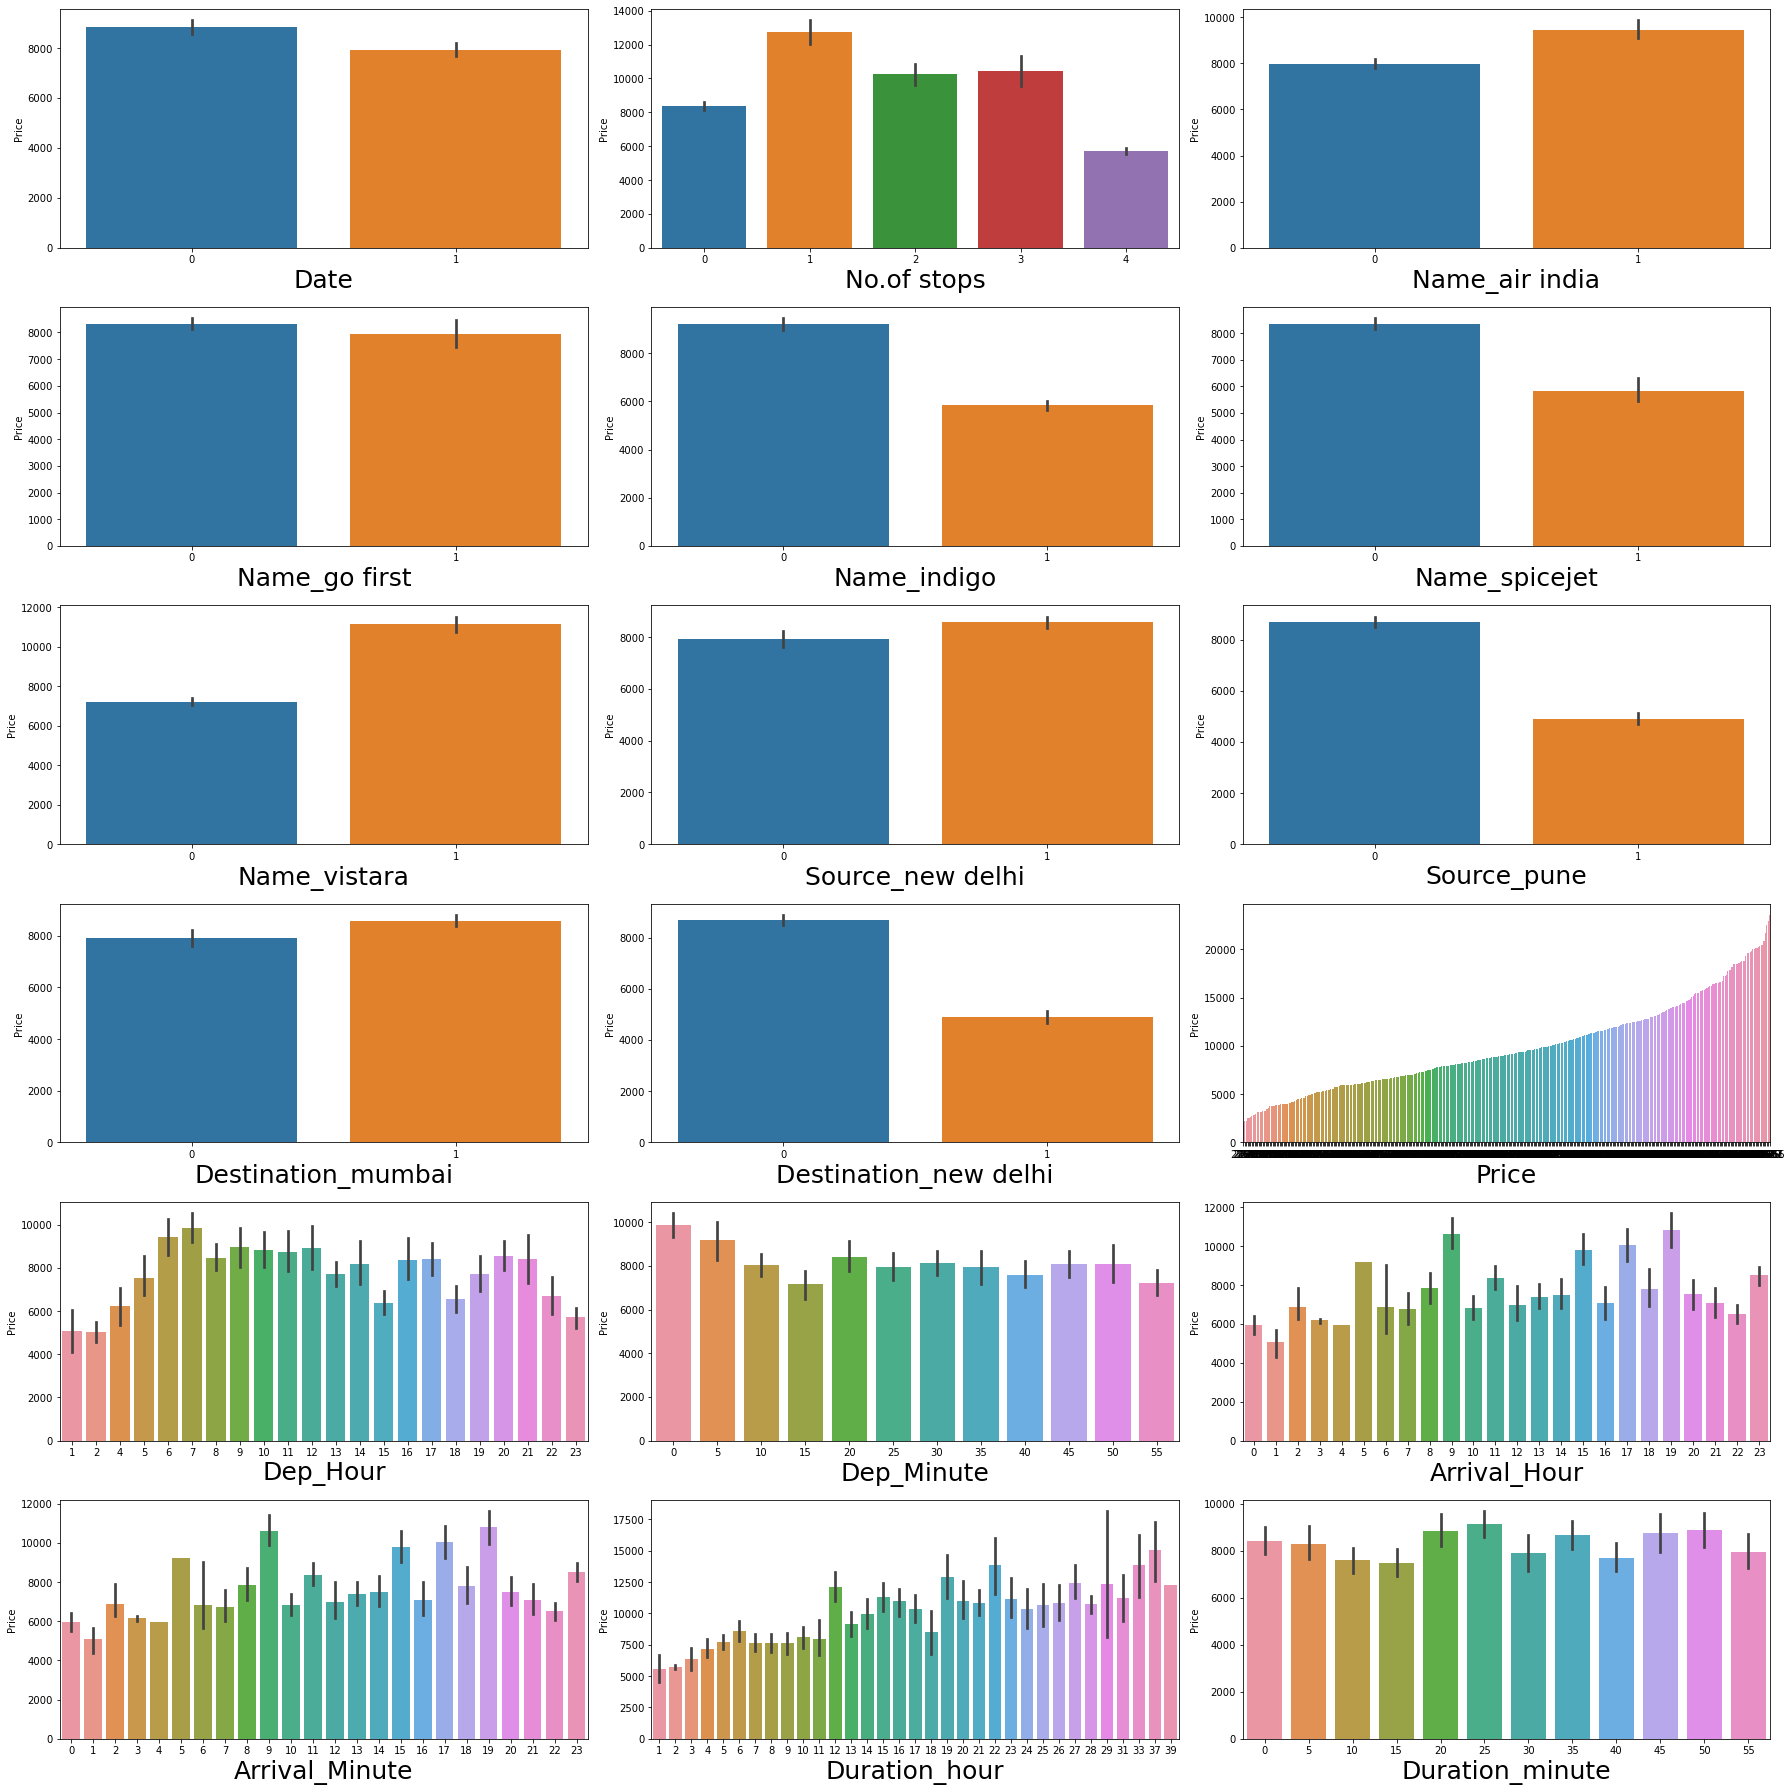

In [34]:
plt.figure(figsize=(25,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.barplot(x=df[column],y=df['Price'],data=df)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [35]:
#Finding the Correlation
df.corr()

,Date,No.of stops,Name_air india,Name_go first,Name_indigo,Name_spicejet,Name_vistara,Source_new delhi,Source_pune,Destination_mumbai,Destination_new delhi,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
Date,1.000000,-0.041627,-0.046806,-0.038282,0.100931,-0.056196,-0.057339,-0.738614,0.279532,-0.738614,0.279532,-0.110531,-0.054532,-0.072955,-0.091664,-0.091664,0.147506,-0.001955
No.of stops,-0.041627,1.000000,0.019435,0.093943,-0.047904,0.158574,-0.057294,0.106847,0.124942,0.106847,0.124942,-0.284452,0.091014,-0.050557,-0.056348,-0.056348,-0.388564,-0.417168
Name_air india,-0.046806,0.019435,1.000000,-0.199445,-0.299319,-0.094410,-0.287527,-0.008769,-0.086296,-0.008769,-0.086296,0.146576,-0.030247,-0.214673,0.025200,0.025200,0.296811,0.006593
Name_go first,-0.038282,0.093943,-0.199445,1.000000,-0.260391,-0.082132,-0.250133,0.124245,0.030954,0.124245,0.030954,-0.034405,0.023262,-0.000379,0.045048,0.045048,-0.235463,0.002463
Name_indigo,0.100931,-0.047904,-0.299319,-0.260391,1.000000,-0.123260,-0.375390,-0.135799,0.115991,-0.135799,0.115991,-0.385505,-0.048701,0.063566,-0.019950,-0.019950,-0.310918,0.014034
Name_spicejet,-0.056196,0.158574,-0.094410,-0.082132,-0.123260,1.000000,-0.118404,0.079832,0.099014,0.079832,0.099014,-0.121924,0.015078,0.050370,0.001996,0.001996,-0.070322,-0.068055
Name_vistara,-0.057339,-0.057294,-0.287527,-0.250133,-0.375390,-0.118404,1.000000,0.043913,-0.149626,0.043913,-0.149626,0.440804,0.050091,0.057375,0.019814,0.019814,0.308726,-0.043567
Source_new delhi,-0.738614,0.106847,-0.008769,0.124245,-0.135799,0.079832,0.043913,1.000000,-0.378454,1.000000,-0.378454,0.085122,0.072928,0.067830,0.066286,0.066286,-0.224705,-0.029851
Source_pune,0.279532,0.124942,-0.086296,0.030954,0.115991,0.099014,-0.149626,-0.378454,1.000000,-0.378454,1.000000,-0.309894,0.133744,0.068312,-0.068007,-0.068007,-0.175319,-0.083775
Destination_mumbai,-0.738614,0.106847,-0.008769,0.124245,-0.135799,0.079832,0.043913,1.000000,-0.378454,1.000000,-0.378454,0.085122,0.072928,0.067830,0.066286,0.066286,-0.224705,-0.029851


In [ ]:
# Multicollinearity exists in the dataset

In [36]:
#Statistical Analysis

df.describe()

,Date,No.of stops,Name_air india,Name_go first,Name_indigo,Name_spicejet,Name_vistara,Source_new delhi,Source_pune,Destination_mumbai,Destination_new delhi,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.00000,1630.00000,1630.000000,1630.000000
mean,0.629448,1.177914,0.186503,0.147853,0.280982,0.037423,0.265031,0.519018,0.117178,0.519018,0.117178,8262.580368,12.255215,24.684049,15.18773,15.18773,9.507362,24.650307
std,0.483101,1.695407,0.389632,0.355063,0.449616,0.189855,0.441485,0.499792,0.321731,0.499792,0.321731,3935.805684,5.239379,17.606334,5.74753,5.74753,7.998136,17.040930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2165.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5954.000000,8.000000,10.000000,10.00000,10.00000,3.000000,10.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6375.000000,12.000000,25.000000,16.00000,16.00000,7.000000,20.000000
75%,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,10470.000000,17.000000,40.000000,20.00000,20.00000,13.000000,40.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23565.000000,23.000000,55.000000,23.00000,23.00000,39.000000,55.000000


In [37]:
df.shape

(1630, 18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.forma

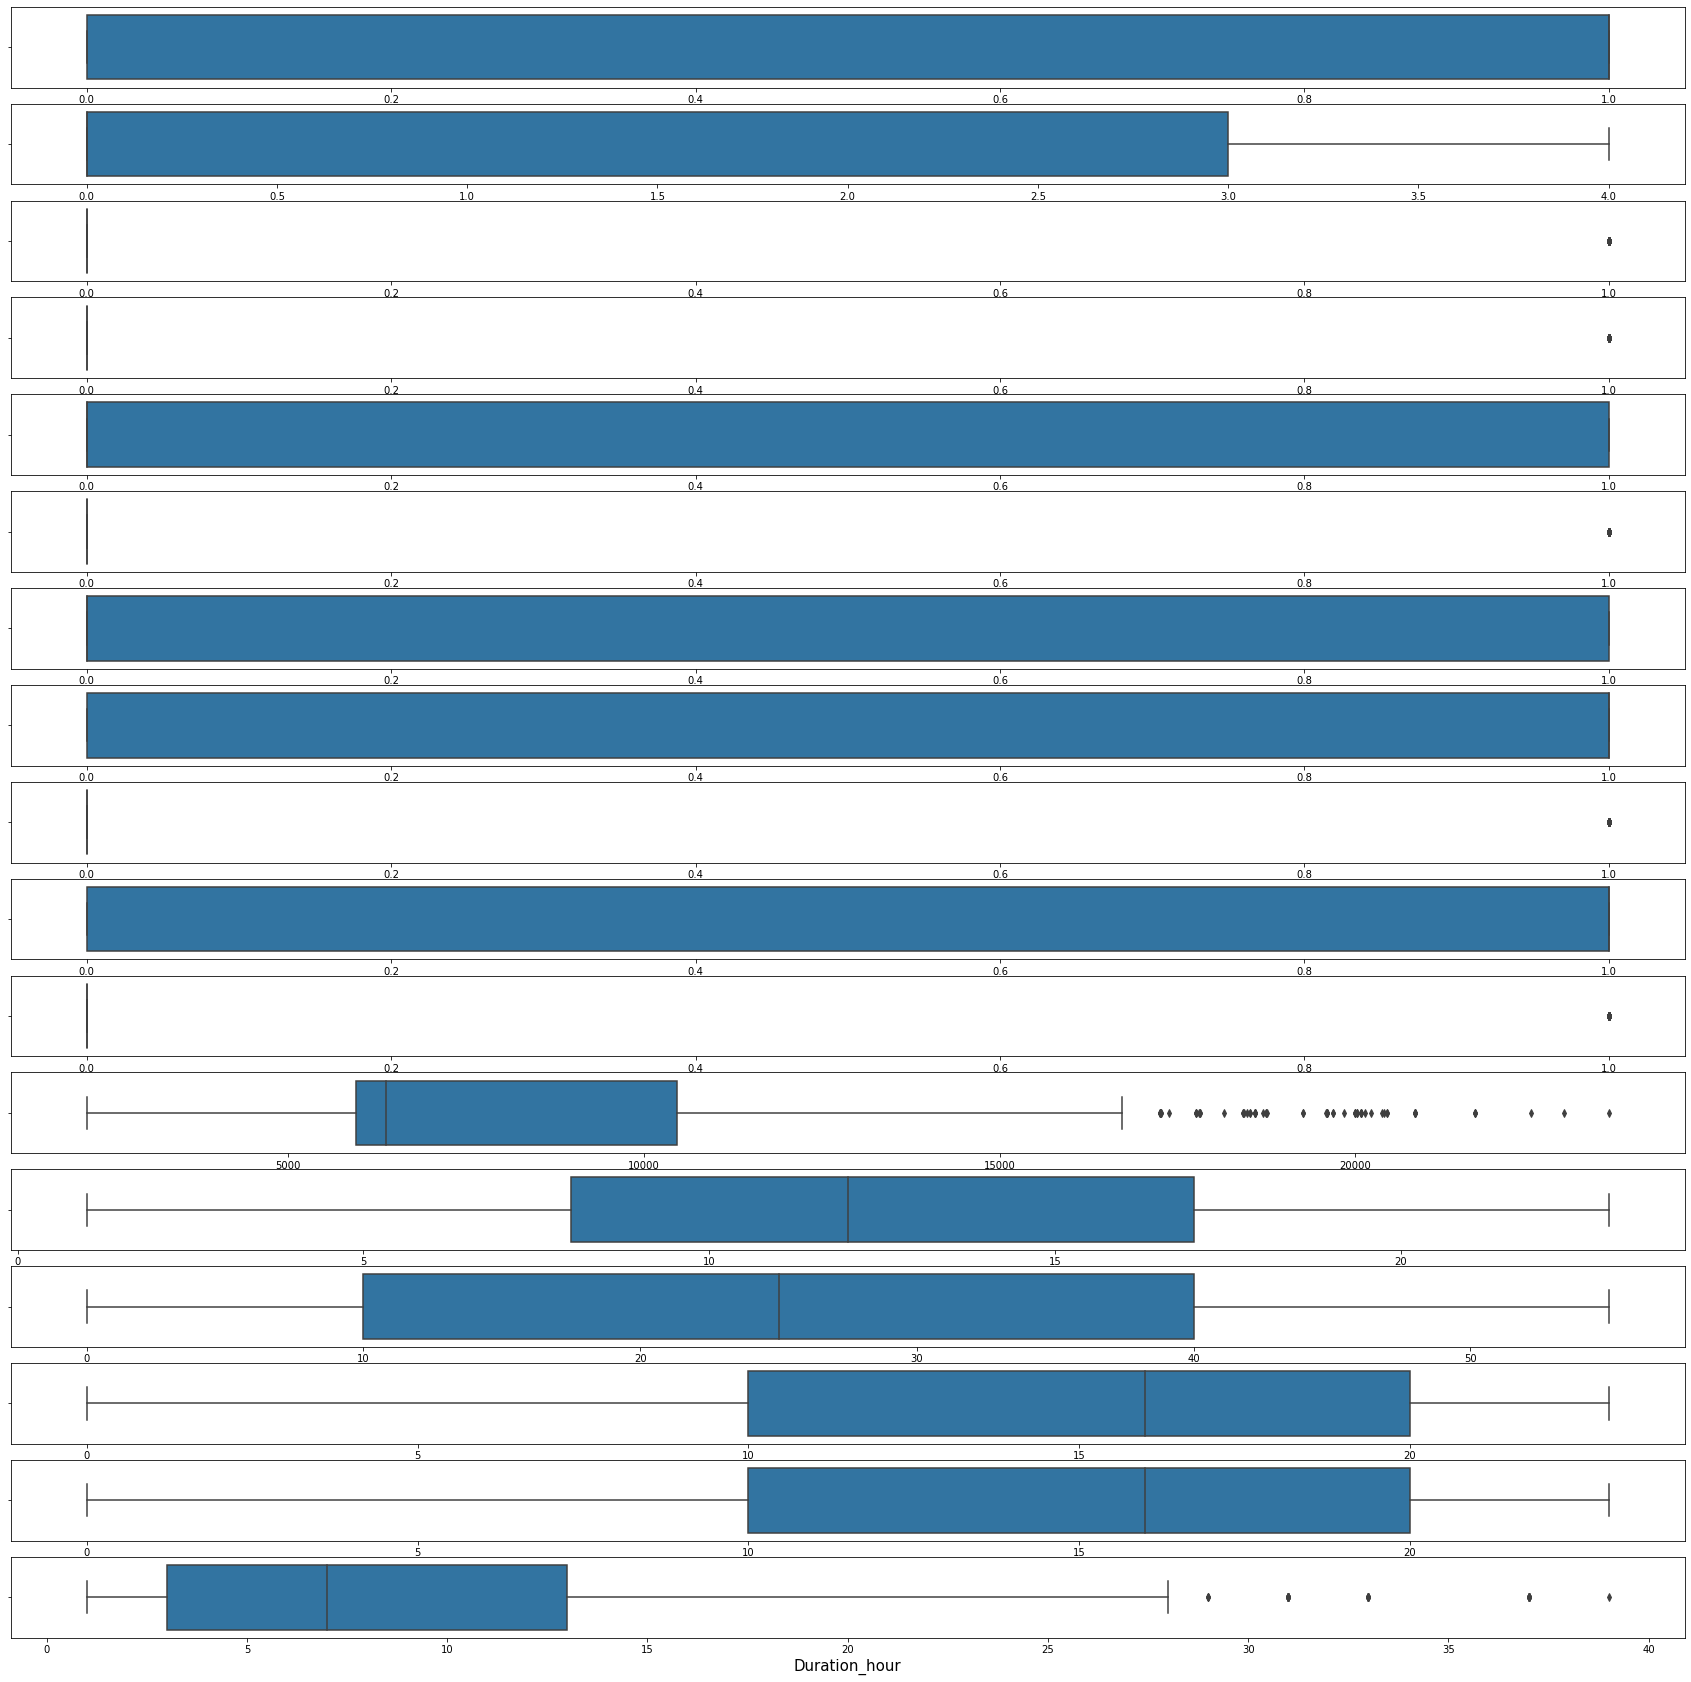

In [38]:
#From the statistical Analysis, I came to the conclusion that outliers are not that prominent in the dataset.

# Plotting boxplot
plt.figure(figsize=(30,30))
gr = 1
for column in df:
    if gr<=17:
        ax = plt.subplot(17,1,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

In [39]:
#Checking Skewness
df.skew()

Date                    -0.536562
No.of stops              0.962010
Name_air india           1.611173
Name_go first            1.986013
Name_indigo              0.975442
Name_spicejet            4.878933
Name_vistara             1.065758
Source_new delhi        -0.076199
Source_pune              2.382689
Destination_mumbai      -0.076199
Destination_new delhi    2.382689
Price                    1.124238
Dep_Hour                 0.098933
Dep_Minute               0.115129
Arrival_Hour            -0.451198
Arrival_Minute          -0.451198
Duration_hour            1.253528
Duration_minute          0.302911
dtype: float64

In [ ]:
#Skewness exists in the variables except Source_new delhi,Destination_mumbai,Dep_Hour,Dep_Minute, Arrival_Hour,Arrival_Minute, Duration_minute

In [40]:
# Removing outliers by z-score method
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (1630, 18)
[[1.30333246 0.69498102 0.478812   ... 0.8375331  0.56372453 0.60752961]
 [1.30333246 0.69498102 0.478812   ... 0.14136841 0.43865702 0.60752961]
 [1.30333246 0.69498102 0.478812   ... 0.8375331  0.31358951 0.60752961]
 ...
 [0.76726394 0.69498102 0.478812   ... 1.35965661 0.188522   0.8599767 ]
 [0.76726394 0.69498102 0.478812   ... 1.18561544 0.188522   1.19453213]
 [0.76726394 0.69498102 0.478812   ... 2.64329033 0.0634545  0.8599767 ]]
Row numbers :  [  21   28   31   34   50   78   95  143  144  145  167  170  172  173
  177  183  188  192  223  282  297  306  308  319  329  342  352  445
  454  456  467  477  490  500  597  618  628  651  672  715  721  722
  728  731  732  733  734  843  899  926  927  928  928  929  929  930
  931  932  933  934  935  936  937  938  939 1014 1016 1103 1104 1228
 1229 1240 1241 1242 1338 1429 1430 1450 1451 1453 1475 1484 1493 1495
 1534 1542 1554 1563 1568 1578 1579 1585 1596 1603]
Column numbers :  [  21   28   31   34 

In [41]:
# data loss is negligible
loss = (1630-1538)/1630*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  5.644171779141105 % of data


In [42]:
#Splitting the dataset into x and y

x = df1.drop('Price',axis=1)
y = df1['Price']

In [43]:
# Removing skewness

from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[-1.30498571, -0.75785516, -0.49430413, ...,  0.84438537,
        -0.36898077,  0.65949548],
       [-1.30498571, -0.75785516, -0.49430413, ...,  0.09692581,
        -0.15666568,  0.65949548],
       [-1.30498571, -0.75785516, -0.49430413, ...,  0.84438537,
         0.02613771,  0.65949548],
       ...,
       [ 0.76629192, -0.75785516, -0.49430413, ...,  1.42928737,
         0.18652949, -0.79400218],
       [ 0.76629192, -0.75785516, -0.49430413, ...,  1.23216589,
         0.18652949,  1.10363798],
       [ 0.76629192, -0.75785516, -0.49430413, ..., -2.30433871,
         0.32933132, -0.79400218]])

In [44]:
# Checking skewness again

x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()


Date                    -0.539220
No.of stops              0.623062
Name_air india           1.530235
Name_go first            1.911121
Name_indigo              0.885258
Name_spicejet            0.000000
Name_vistara             1.068154
Source_new delhi        -0.075550
Source_pune              2.445057
Destination_mumbai      -0.075550
Destination_new delhi    2.445057
Dep_Hour                -0.095903
Dep_Minute              -0.343975
Arrival_Hour            -0.244910
Arrival_Minute          -0.244910
Duration_hour            0.010139
Duration_minute         -0.223659
dtype: float64

In [ ]:
#Skewness exists in the dataset

In [45]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)

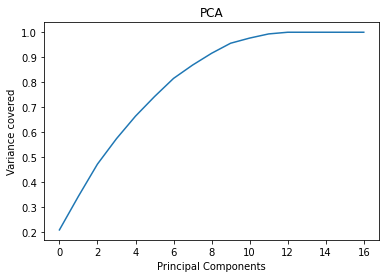

In [46]:
# Applying PCA 

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [47]:
pca = PCA(n_components=12)
principal = pca.fit_transform(x_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4",'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.987674,0.681426,-1.149939,-0.836613,-0.117169,0.610664,-0.254500,-0.143953,0.425935,0.033627,-0.127217,0.465392
1,-1.801169,0.021254,-0.032370,-0.779257,-0.434892,0.715018,-0.114505,0.645201,0.381295,-0.185429,-0.161138,0.364041
2,-1.981425,0.397213,-1.152067,-0.832009,-0.178627,0.635227,-0.207754,0.148374,0.546651,0.181886,-0.171317,0.179319
3,-1.418514,-0.628601,1.479834,-1.931921,0.555104,1.506200,-0.443745,-1.026111,-0.296344,-0.093981,-0.353902,0.021388
4,-1.364623,-0.555061,2.173670,-0.664096,0.513422,0.821882,-0.698165,-0.083096,-1.412814,1.105369,-0.358107,0.130299
...,...,...,...,...,...,...,...,...,...,...,...,...
1533,4.314922,0.792943,2.083347,-2.086644,0.435263,1.559032,-1.403711,0.161776,-0.993069,0.108115,-0.015734,-0.022085
1534,4.291518,0.627755,1.777547,-2.726006,0.372083,1.864870,-1.219497,-0.073916,-0.249934,-0.356787,-0.022922,-0.195218
1535,3.451257,2.220689,-2.357368,-0.581609,0.049985,0.443314,-1.384404,1.026459,-0.329655,1.199332,0.104843,-0.368178
1536,3.461671,1.694347,-2.573525,-1.349402,-0.214636,1.084077,-1.083250,0.969795,0.394086,-0.135982,0.074426,-0.613153


In [48]:
# Finding the Best Random State

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
max_score = 0
max_rs = 0
for i in range(1,400):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = lr.score(x_train,y_train)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.4604837045318829 when 163 is the random state


In [51]:
#Splitting into train and test data

x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 163)

In [52]:
#i) Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  0.8025550444714823
Score in testing dataset is  0.4646517609992098
MAE is :  1653.4801236858377
MSE is : 7217665.372873782
RMSE is : 2686.5713042600937


In [53]:
# ii) Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.790315169756685
Score in testing dataset is  0.5090523639099324
MAE is :  1674.05169240327
MSE is : 6619048.116260432
RMSE is : 2572.751079342973


In [54]:
# iii)SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",svr.score(x_train,y_train))
print("Score in testing dataset is ",svr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

Score in training dataset is  -0.19334048480218957
Score in testing dataset is  -0.19293049730823286
MAE is :  2723.071216114917
MSE is : 16083312.721336933
RMSE is : 4010.400568688486


In [55]:
# iv)XGBR
import xgboost as xgb
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in training dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

Score in training dataset is  0.8023260302018349
Score in training dataset is  0.4973589425382259
MAE is :  1622.4995161576705
MSE is : 6776701.016515631
RMSE is : 2603.2097526929388


In [56]:
# Finding the Cross-Validation Score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [57]:
cvs = cross_val_score(dt,x_scaled,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model is : ",cvs.mean())

Cross validation score of DecisionTreeRegressor model is :  0.3111115759150523


In [58]:
cvs = cross_val_score(rf,x_scaled,y,cv=5)
print("Cross validation score of Random forest model is : ",cvs.mean())

Cross validation score of Random forest model is :  0.42332635253400885


In [59]:
cvs = cross_val_score(svr,x_scaled,y,cv=5)
print("Cross validation score of SVR model is : ",cvs.mean())

Cross validation score of SVR model is :  -0.33963848597848767


In [60]:
cvs = cross_val_score(xgbr,x_scaled,y,cv=5)
print("Cross validation score of XGBRegressor model is : ",cvs.mean())

Cross validation score of XGBRegressor model is :  0.3511585120496172


In [61]:
#Finding the best model
models = pd.DataFrame([["DecisionTreeRegressor","46.47","31.11","15.36"],["RandomForestRegressor","50.91","42.33","8.58"],["SVR","19.29","33.96","14.67"],["XGBRegressor","49.74","35.11","14.63"]],columns=["Model","Score","Cross Validation Score","Difference"])
models

,Model,Score,Cross Validation Score,Difference
0,DecisionTreeRegressor,46.47,31.11,15.36
1,RandomForestRegressor,50.91,42.33,8.58
2,SVR,19.29,33.96,14.67
3,XGBRegressor,49.74,35.11,14.63


In [62]:
# Considering Random Forest as the best model and Hyper tuning the best parameter
params = {'random_state':[1,50],
         'max_depth':[2,10,2],
         'min_samples_leaf':[1,10,2],
         'min_samples_split':[2,12,2]}
grid = GridSearchCV(estimator = rf,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 12, 'random_state': 1}


In [63]:
rf = RandomForestRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=12,random_state=1)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.7557490303250379
Score in testing dataset is  0.5167773928257262
MAE is :  1768.587072552355
MSE is : 6514897.827442741
RMSE is : 2552.4297889349946


In [ ]:
# After Hyper parameter tuning Accuracy increased to 51.68%

In [64]:
# Saving the model
import pickle
filename = 'Flight Price.pkl'
pickle.dump(rf,open(filename,'wb'))